# **Práctica 4: Métricas de distancia (datos estandarizados)**

Nombre: Monroy Mendoza Angel Damian

Número de cuenta:316040707

Email: adamianmm@gmail.com

**Objetivo.**  Realizar una reducción de la dimensionalidad basada en ACD y, con base en esa selección, obtener una matriz de distancias mediante las cuatro funciones vistas en clase.


**Fuente de datos:**

* ID number: identifica al paciente.
* Diagnosis: Diagnóstico (M = Maligno, B = Benigno). 
* Radius: Media de las distancias del centro y puntos del perímetro
* Texture: Desviación estándar de la escala de grises
* Perimeter Valor del perímetro del cáncer de mama
* Area: Valor del área del cáncer de mama.
* Smoothness: Variación de la longitud del radio.
* Compactness: Perímetro ^2/Area - 1
* Concavity: Caída o gravedad de las curvas de nivel.
* Concave points: Número de sectores de contorno cóncavo.
* Symmetry: Simetría de la imagen.
* Fractal dimension: "Aproximación de frontera" - 1

#### **1) Importar las bibliotecas necesarias**


In [50]:
import pandas as pd                         # Para la manipulación y análisis de datos
import numpy as np                          # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt             # Para generar gráficas a partir de los datos
import seaborn as sns
from scipy.spatial.distance import cdist    # Para el cálculo de distancias
from scipy.spatial import distance

#### **2) Importar los datos**

In [65]:
Cancer = pd.read_csv("C:/Users/Principal/Desktop/FI/FI Semester 9/Inteligencia Artificial/Practicas/P2 - Métricas de distancia/Datos/WDBCOriginal.csv")
Cancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [74]:
len(Cancer.groupby('Diagnosis').size())

2

In [ ]:
len(Cancer.groupby('Diagnosis').size())

539

#### **3) Procesamiento de datos**

**Tipos de datos**

Es importante conocer los tipos de datos que hay en tu conjunto de datos, pues nos da una idea del procesamiento
que se le tendrá que hacer para realizar los procedimientos que queremos.

In [66]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDNumber          569 non-null    object 
 1   Diagnosis         569 non-null    object 
 2   Radius            569 non-null    float64
 3   Texture           569 non-null    float64
 4   Perimeter         569 non-null    float64
 5   Area              569 non-null    float64
 6   Smoothness        569 non-null    float64
 7   Compactness       569 non-null    float64
 8   Concavity         569 non-null    float64
 9   ConcavePoints     569 non-null    float64
 10  Symmetry          569 non-null    float64
 11  FractalDimension  569 non-null    float64
dtypes: float64(10), object(2)
memory usage: 53.5+ KB


**Valores faltantes**

A su vez, es una buena práctica en el análisis de datos el identificar si se cuentan con valores nulos o no, pues la precencia de estos valores puede afectar nuestro procesamiento o mandarnos algún error en líneas de código posteriores.

In [67]:
Cancer.isnull().sum()

IDNumber            0
Diagnosis           0
Radius              0
Texture             0
Perimeter           0
Area                0
Smoothness          0
Compactness         0
Concavity           0
ConcavePoints       0
Symmetry            0
FractalDimension    0
dtype: int64

In [69]:
cancer = pd.get_dummies(Cancer             #convertimos la variable categórica de Diagnosis y ahora 1 es Maligno y 0 es Benigno
               ,columns = ['Diagnosis']
               ,drop_first = True          #Se colocó True debido a que basta con una columna para saber si es Maligno o Benigno
               )
cancer = cancer.drop(['IDNumber'], axis=1) #quitamos la columna de ID debido a que no es relevante para nuestro objetivo
cancer

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,Diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1


In [63]:
cancer['Diagnosis_M'].nunique()

2

In [60]:
X = np.array(cancer)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1.0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.0


#### **4) Inspección visual**

**Evaluación Visual**

Haremos una inspección visual de los datos que creamos que tendrán correlación para darnos una mejor idea de lo que
veremos con la madriz de correlación

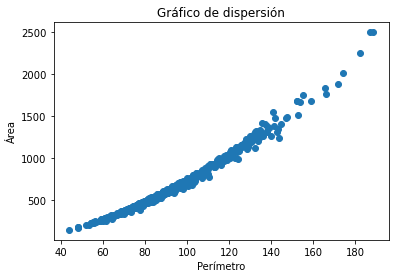

In [6]:
plt.plot(cancer['Perimeter'], cancer['Area'], 'o')
plt.title('Gráfico de dispersión')
plt.xlabel('Perímetro')
plt.ylabel('Área')
plt.show()

Podemos observar que se tiene una **correlación perfecta positiva** por lo que seguramente se pueda reducir alguna de estas dos dimenciones.

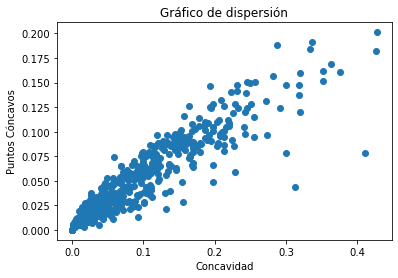

In [7]:
plt.plot(cancer['Concavity'], cancer['ConcavePoints'], 'o')
plt.title('Gráfico de dispersión')
plt.xlabel('Concavidad')
plt.ylabel('Puntos Cóncavos')
plt.show()

Aquí observamos una **baja** o incluso una **alta correlación positiva**, en donde la matriz de correlación nos dará información más precisa para considerarla en la reducción o no.

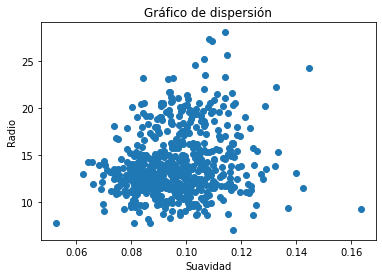

In [8]:
plt.plot(cancer['Smoothness'], cancer['Radius'], 'o')
plt.title('Gráfico de dispersión')
plt.xlabel('Suavidad')
plt.ylabel('Radio')
plt.show()

Por último, en esta gráfica observamos que aparentemente **no hay correlación**, sin embargo obtendremos una mejor información en la matriz de correlación

#### **5) Reducción de dimensiones**

In [9]:
cancer.corr()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,Diagnosis_M
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


**Mapa de calor**

Para obtener conclusiones de los datos de una forma más visual y sencilla se utiliza el mapa de calor.

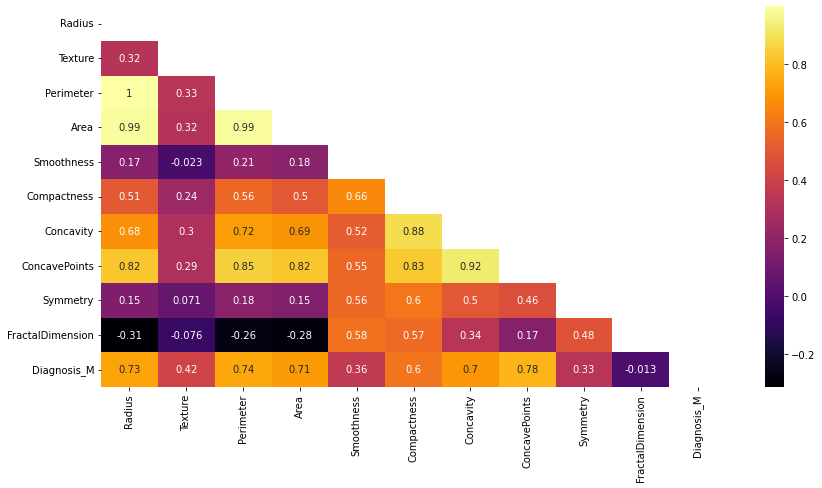

In [10]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(cancer.corr())
sns.heatmap(cancer.corr(),cmap = 'inferno', annot = True, mask = MatrizInf)
plt.show()

Siguiendo el siguiente criterio:

    *  |+-1.00 a +-0.67| -> Fuerte o Alta
    *  |+-0.66 a +-0.34| -> Moderada o Media
    *  |+-0.33 a +-0.00| -> Débil o Baja

Por lo que podemos decir que las siguientes características tienen una relación **fuerte**:
    
    * Perímetro - Radio                   (1.00)
    * Área - Radio                        (0.99)
    * Concavidad - Radio                  (0.68)
    * Puntos Cóncavos - Radio             (0.82)
    * Área - Perímetro                    (0.99)
    * Concavidad - Perímetro              (0.72)
    * Puntos Cóncavos - Perímetro         (0.85)
    * Concavidad - Área                   (0.69)
    * Puntos Cóncavos - Área              (0.82)
    * Suavidad - Compactibilidad          (0.66)
    * Concavidad - Compactibilidad        (0.88)
    * Puntos Cóncavos - Compactibilidad   (0.85)
    * Puntos Cóncavos - Concavidad        (0.92)
    



In [48]:
cancer = cancer.drop(['Perimeter', 'Area','Concavity','ConcavePoints'], axis=1)
cancer

,Radius,Texture,Smoothness,Compactness,Symmetry,FractalDimension,Diagnosis_M
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,1
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,1
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,1
...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,1
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,1
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,1


In [49]:
cancer.columns[:]

Index(['Radius', 'Texture', 'Smoothness', 'Compactness', 'Symmetry',
       'FractalDimension', 'Diagnosis_M'],
      dtype='object')

In [44]:
cancer = cancer.drop([cancer.columns[0]], axis=1)
cancer = cancer.drop([cancer.columns[0]], axis =1)
cancer

,Diagnosis_M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


No se redujo la dimensión de la relación **Suavidad - Compactibilidad** debido a que el mapa de calor redondeo la puntuación que sacó, pues estrictamente cuenta con un valor de 0.659123

#### **6) Matrices de distancia**

**Estandarización de datos**

En los algoritmos basados en distancias es fundamental escalar o normalizar los datos para que cada una de las variables contribuyan por igual en el análisis.

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #bibliotecas(no librerías), StandardScaler es escalamiento y MinMaxScaler es normalización
estandarizar = StandardScaler()                               # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = estandarizar.fit_transform(cancer)         # Se calculan la media y desviación y se escalan los datos 

In [93]:
cancer = pd.DataFrame(MEstandarizada) 
cancer 

,0,1,2,3,4,5,6
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,1.297676
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,1.297676
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,1.297676
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,1.297676
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,1.297676
...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,-0.312589,-0.931027,1.297676
565,1.704854,2.085134,0.102458,-0.017833,-0.217664,-1.058611,1.297676
566,0.702284,2.045574,-0.840484,-0.038680,-0.809117,-0.895587,1.297676
567,1.838341,2.336457,1.525767,3.272144,2.137194,1.043695,1.297676


**a) Matriz de distancias: Euclidiana**

In [94]:
DstEuclidiana = cdist(cancer, cancer, metric='euclidean') #creamos un objeto y le instanciamos el cálculo de
                                                                          #distancias con cdist que recibe como parámetros
                                                                          #las dos matrices con las que sacarán las distancias
                                                                          #la métrica que se va a utilizar
MEuclidiana = pd.DataFrame(DstEuclidiana)

In [95]:
print(MEuclidiana)
#MEuclidiana 

          0         1         2          3         4         5         6    \
0    0.000000  6.174365  4.546932   4.396037  4.834014  3.196418  5.690578   
1    6.174365  0.000000  2.705871   8.987098  1.736955  5.153350  1.241247   
2    4.546932  2.705871  0.000000   6.961528  2.060248  3.584659  1.860336   
3    4.396037  8.987098  6.961528   0.000000  7.985967  4.429263  8.194171   
4    4.834014  1.736955  2.060248   7.985967  0.000000  4.053390  1.570818   
..        ...       ...       ...        ...       ...       ...       ...   
564  5.921501  2.308341  1.705874   8.241077  2.132934  4.614548  1.631764   
565  6.901117  2.670445  2.509312   8.743409  3.333390  5.443185  2.040145   
566  7.283727  2.808277  3.312376   9.025491  3.696259  5.644511  2.208106   
567  4.633922  5.926417  3.518554   5.452615  5.327597  4.694021  5.113101   
568  9.072422  5.140827  6.384456  10.558175  6.131741  7.346936  5.035954   

          7         8         9    ...       559       560     

In [96]:
print(MEuclidiana.round(3))

       0      1      2       3      4      5      6      7      8      9    \
0    0.000  6.174  4.547   4.396  4.834  3.196  5.691  3.606  3.548  3.922   
1    6.174  0.000  2.706   8.987  1.737  5.153  1.241  4.607  5.405  6.043   
2    4.547  2.706  0.000   6.962  2.060  3.585  1.860  2.791  3.248  4.180   
3    4.396  8.987  6.962   0.000  7.986  4.429  8.194  4.592  4.049  3.636   
4    4.834  1.737  2.060   7.986  0.000  4.053  1.571  3.850  4.558  5.261   
..     ...    ...    ...     ...    ...    ...    ...    ...    ...    ...   
564  5.922  2.308  1.706   8.241  2.133  4.615  1.632  3.991  4.569  5.258   
565  6.901  2.670  2.509   8.743  3.333  5.443  2.040  4.463  5.033  5.509   
566  7.284  2.808  3.312   9.025  3.696  5.645  2.208  4.724  5.402  5.570   
567  4.634  5.926  3.519   5.453  5.328  4.694  5.113  3.635  3.317  3.491   
568  9.072  5.141  6.384  10.558  6.132  7.347  5.036  6.727  7.448  7.464   

     ...    559    560     561    562    563    564    565    5

Matriz de distancias de una parte del total de objetos

In [97]:
DstEuclidiana = cdist(cancer[0:10], cancer[0:10], metric='euclidean') #muestra con los primeros 10 elementos
MEuclidiana = pd.DataFrame(DstEuclidiana)
print(MEuclidiana) 

          0         1         2         3         4         5         6  \
0  0.000000  6.174365  4.546932  4.396037  4.834014  3.196418  5.690578   
1  6.174365  0.000000  2.705871  8.987098  1.736955  5.153350  1.241247   
2  4.546932  2.705871  0.000000  6.961528  2.060248  3.584659  1.860336   
3  4.396037  8.987098  6.961528  0.000000  7.985967  4.429263  8.194171   
4  4.834014  1.736955  2.060248  7.985967  0.000000  4.053390  1.570818   
5  3.196418  5.153350  3.584659  4.429263  4.053390  0.000000  4.335135   
6  5.690578  1.241247  1.860336  8.194171  1.570818  4.335135  0.000000   
7  3.606113  4.606730  2.791344  4.591793  3.850141  1.475235  3.716812   
8  3.547616  5.405096  3.247766  4.049308  4.558298  1.808325  4.464338   
9  3.922413  6.042736  4.179641  3.636384  5.260896  2.603077  5.093631   

          7         8         9  
0  3.606113  3.547616  3.922413  
1  4.606730  5.405096  6.042736  
2  2.791344  3.247766  4.179641  
3  4.591793  4.049308  3.636384  
4  3

Distancia entre dos objetos

In [98]:
Objeto1 = cancer[0]
Objeto2 = cancer[1]
dstEuclidiana = distance.euclidean(Objeto1,Objeto2)
dstEuclidiana 

27.74051564272445

**b) Matriz de distancias: Chebyshev**

In [99]:
DstChebyshev = cdist(cancer, cancer, metric='chebyshev')
MChebyshev = pd.DataFrame(DstChebyshev)

In [100]:
print(MChebyshev)

          0         1         2         3         4         5         6    \
0    0.000000  3.770586  2.653755  2.655172  2.818197  2.039179  3.195219   
1    3.770586  0.000000  1.769173  5.779572  1.107334  3.064384  0.703826   
2    2.653755  1.769173  0.000000  5.308927  1.608003  2.288013  1.065347   
3    2.655172  5.779572  5.308927  0.000000  5.473369  3.020914  5.673251   
4    2.818197  1.107334  1.608003  5.473369  0.000000  2.452455  1.312466   
..        ...       ...       ...       ...       ...       ...       ...   
564  3.186774  1.868805  1.252274  5.841946  1.873289  2.821032  1.164978   
565  4.158469  2.438766  1.628947  5.969531  3.236950  2.948616  1.924485   
566  4.118909  2.399206  1.782694  5.806506  3.197390  3.077905  1.884924   
567  4.409792  3.759215  2.219218  3.867224  3.488274  3.171792  3.183849   
568  4.680551  3.638222  4.054295  6.395638  3.558698  5.349506  2.988949   

          7         8         9    ...       559       560       561  \
0  

Matriz de distancias de una parte del total de objetos

In [101]:
DstChebyshev = cdist(cancer[0:10], cancer[0:10], metric='chebyshev')
MChebyshev = pd.DataFrame(DstChebyshev)
print(MChebyshev)

          0         1         2         3         4         5         6  \
0  0.000000  3.770586  2.653755  2.655172  2.818197  2.039179  3.195219   
1  3.770586  0.000000  1.769173  5.779572  1.107334  3.064384  0.703826   
2  2.653755  1.769173  0.000000  5.308927  1.608003  2.288013  1.065347   
3  2.655172  5.779572  5.308927  0.000000  5.473369  3.020914  5.673251   
4  2.818197  1.107334  1.608003  5.473369  0.000000  2.452455  1.312466   
5  2.039179  3.064384  2.288013  3.020914  2.452455  0.000000  2.652337   
6  3.195219  0.703826  1.065347  5.673251  1.312466  2.652337  0.000000   
7  2.431785  2.529006  2.058361  3.250566  2.222803  1.193785  2.422685   
8  2.662165  3.028801  1.970470  3.338458  2.134912  1.424165  2.334794   
9  3.178774  3.651748  3.181104  2.127824  3.345546  1.940774  3.545428   

          7         8         9  
0  2.431785  2.662165  3.178774  
1  2.529006  3.028801  3.651748  
2  2.058361  1.970470  3.181104  
3  3.250566  3.338458  2.127824  
4  2

Distancia entre dos objetos

In [102]:
Objeto1 = cancer[0]
Objeto2 = cancer[1]
dstChebyshev = distance.chebyshev(Objeto1,Objeto2)
dstChebyshev

4.204695389088045

**c) Matriz de distancias: Manhattan**

In [103]:
DstManhattan = cdist(cancer, cancer, metric='cityblock')
MManhattan = pd.DataFrame(DstManhattan)

In [104]:
print(MManhattan)

           0          1          2          3          4          5    \
0     0.000000  13.958996   9.800776   9.332562  10.652292   7.097428   
1    13.958996   0.000000   5.777859  19.852153   3.328610  11.346356   
2     9.800776   5.777859   0.000000  14.479204   4.067523   7.188136   
3     9.332562  19.852153  14.479204   0.000000  18.141817   9.469203   
4    10.652292   3.328610   4.067523  18.141817   0.000000   8.672614   
..         ...        ...        ...        ...        ...        ...   
564  13.116694   4.307571   3.515182  17.795122   3.987343  10.504054   
565  15.283153   4.371407   5.482377  19.961581   4.721745  12.670513   
566  16.422799   4.826100   7.587671  20.311667   7.076972  13.020599   
567   6.497512  12.858705   7.580711  11.175940  11.307417  10.204073   
568  23.238059  11.359816  14.402931  24.184540  13.895067  17.478542   

           6          7          8          9    ...        559        560  \
0    12.494569   7.235915   7.247473   7.4313

Matriz de distancias de una parte del total de objetos

In [105]:
DstManhattan = cdist(cancer[0:10], cancer[0:10], metric='cityblock')
MManhattan = pd.DataFrame(DstManhattan)
print(MManhattan)

           0          1          2          3          4          5  \
0   0.000000  13.958996   9.800776   9.332562  10.652292   7.097428   
1  13.958996   0.000000   5.777859  19.852153   3.328610  11.346356   
2   9.800776   5.777859   0.000000  14.479204   4.067523   7.188136   
3   9.332562  19.852153  14.479204   0.000000  18.141817   9.469203   
4  10.652292   3.328610   4.067523  18.141817   0.000000   8.672614   
5   7.097428  11.346356   7.188136   9.469203   8.672614   0.000000   
6  12.494569   2.624425   4.102829  17.359162   3.001054   9.881929   
7   7.235915  10.649573   5.067188   9.412016   8.939237   2.916854   
8   7.247473  12.697654   6.919795   7.824695  10.987318   3.333371   
9   7.431327  13.670172   8.177087   7.885395  11.959836   5.018553   

           6          7          8          9  
0  12.494569   7.235915   7.247473   7.431327  
1   2.624425  10.649573  12.697654  13.670172  
2   4.102829   5.067188   6.919795   8.177087  
3  17.359162   9.412016   

Distancia entre dos objetos

In [106]:
Objeto1 = cancer[0]
Objeto2 = cancer[1]
dstManhattan = distance.cityblock(Objeto1,Objeto2)
dstManhattan

508.5162014620067

**d) Matriz de distancias: Minkowski**

In [107]:
DstMinkowski = cdist(cancer, cancer, metric='minkowski', p=1.5) #lambda se representa por p
MMinkowski = pd.DataFrame(DstMinkowski)

In [108]:
print(MMinkowski)

           0          1         2          3          4         5    \
0     0.000000   8.024946  5.795809   5.595649   6.209926  4.121053   
1     8.024946   0.000000  3.429022  11.581777   2.131193  6.628859   
2     5.795809   3.429022  0.000000   8.727855   2.522958  4.470394   
3     5.595649  11.581777  8.727855   0.000000  10.371214  5.621238   
4     6.209926   2.131193  2.522958  10.371214   0.000000  5.151873   
..         ...        ...       ...        ...        ...       ...   
564   7.648649   2.767302  2.129300  10.502352   2.526924  6.001116   
565   8.902267   3.022785  3.221726  11.376809   3.578288  7.161706   
566   9.495759   3.283349  4.330037  11.692915   4.429834  7.396528   
567   5.025433   7.630066  4.486478   6.823026   6.773720  5.984783   
568  12.348616   6.559965  8.254642  13.709153   7.974681  9.621725   

           6         7         8         9    ...        559        560  \
0     7.358437  4.476474  4.406202  4.741346  ...   9.532231   9.330895 

Matriz de distancias de una parte del total de objetos

In [109]:
DstMinkowski = cdist(cancer[0:10], cancer[0:10], metric='minkowski', p=1.5)
MMinkowski = pd.DataFrame(DstMinkowski)
print(MMinkowski)

          0          1         2          3          4         5          6  \
0  0.000000   8.024946  5.795809   5.595649   6.209926  4.121053   7.358437   
1  8.024946   0.000000  3.429022  11.581777   2.131193  6.628859   1.577910   
2  5.795809   3.429022  0.000000   8.727855   2.522958  4.470394   2.390133   
3  5.595649  11.581777  8.727855   0.000000  10.371214  5.621238  10.409542   
4  6.209926   2.131193  2.522958  10.371214   0.000000  5.151873   1.893739   
5  4.121053   6.628859  4.470394   5.621238   5.151873  0.000000   5.642721   
6  7.358437   1.577910  2.390133  10.409542   1.893739  5.642721   0.000000   
7  4.476474   6.046537  3.330113   5.745216   5.063139  1.801129   4.779731   
8  4.406202   7.146439  4.128175   4.894821   6.098181  2.162204   5.842336   
9  4.741346   7.854955  5.113147   4.646623   6.847261  3.186243   6.513767   

          7         8         9  
0  4.476474  4.406202  4.741346  
1  6.046537  7.146439  7.854955  
2  3.330113  4.128175  5.113

Distancia entre dos objetos

In [110]:
Objeto1 = cancer[0]
Objeto2 = cancer[1]
dstMinkowski = distance.minkowski(Objeto1,Objeto2, p=1.5)
dstMinkowski

70.85865303464097

In [ ]:
    
def Clust():
    from scipy.spatial.distance import cdist
    from scipy.spatial import distance
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    import scipy.cluster.hierarchy as shc
    from sklearn.cluster import AgglomerativeClustering
    from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
    from sklearn.cluster import KMeans
    from sklearn.metrics import pairwise_distances_argmin_min
    from kneed import KneeLocator
    import seaborn as sns

    st.header("Clustering")
    st.subheader("Clustering Jerárquico - Clustering Particional")
    st.warning("El DataSet subido se comparte entre algoritmos por comodidad, asegurate de cambiarlo cuando no corresponda con el algoritmo que quieres usar")
    upload_file = st.file_uploader("Sube aquí tu DataSet",type= 'csv')
    if upload_file:
        dataframe = pd.read_csv(upload_file)
        dataframe

        st.write("¿Qué algoritmo quieres utilizar?")
        A_J = st.checkbox("Ascendente Jerárquico")
        K_M = st.checkbox("K-Means")

        if A_J and K_M:
            st.warning("Selecciona sólo un algoritmo")
        else:
            if A_J:
                with st.container():
                    col1, col2 = st.columns(2)
                    with col1:
                        InsV = st.checkbox("Inspección Visual")
                    with col2:
                        Alg = st.checkbox("Obtención de Clústeres")

                if InsV:
                    st.subheader("Selecciona la Variable Clase")
                    colum1,colum2 = st.columns([3,1.1])
                    with colum1:
                        VarC = st.selectbox("", dataframe.columns)
                    with colum2:
                        st.write(dataframe.groupby(VarC).size().head(4))

                    if st.checkbox("Gráfico de dispersión de todas las variables: (puede tardar un poco)"):                    
                        with st.spinner("Cargando datos..."):
                            sns.pairplot(dataframe, hue=VarC)
                            st.pyplot()
                    
                    if st.checkbox("Gráfica de Dos Variables"):
                        x_val = st.selectbox("Selecciona la Variable del Eje X", options=dataframe.columns)
                        y_val = st.selectbox("Selecciona la Variable del Eje Y", options=dataframe.columns)

                        with st.spinner("Cargando datos..."):
                            plot = px.scatter(dataframe, x=x_val, y=y_val, color=VarC, template="plotly_dark")
                            st.plotly_chart(plot)

                if Alg:
                    st.subheader("Selección de Características")
                    st.write("Matriz de Correlación con Método de Pearson")

                    CorrDF = dataframe.corr(method="pearson")
                    with st.spinner("Cargando gráfico..."):
                        mask = np.triu(np.ones_like(CorrDF, dtype=bool))
                        rLT = CorrDF.mask(mask)
                        #pio.templates.default = "plotly_dark"

                        heat = go.Heatmap(
                            z = rLT,
                            x = rLT.columns.values,
                            y = rLT.columns.values,
                            zmin = - 0.25, # Sets the lower bound of the color domain
                            zmax = 1,
                            xgap = 1, # Sets the horizontal gap (in pixels) between bricks
                            ygap = 1,
                            colorscale = 'YlGnBu'
                        )

                        title = 'Matriz de Correlaciones de las Variables'

                        layout = go.Layout(
                            title_text=title, 
                            width=700, 
                            height=700,
                            xaxis_showgrid=False,
                            yaxis_showgrid=False,
                            yaxis_autorange='reversed'
                        )

                        fig=go.Figure(data=[heat], layout=layout)
                        st.plotly_chart(fig)

                    columnas = st.multiselect("Elimina las columnas categóricas (y las que quieras descartar)", dataframe.columns)
                    st.info("Por comodidad, sólo se tiene que presionar el botón de 'Eliminar Columna' la primera vez.")
                    st.info("Si no deseas eliminar ninguna columna, presiona el botón sin seleccionar nada")
                    if "button_clicked" not in st.session_state:
                        st.session_state.button_clicked = False
                
                    def callback():
                        st.session_state.button_clicked = True
                    
                    if(
                        st.button("Eliminar Columna",on_click=callback)
                        or st.session_state.button_clicked
                    ):
                        try:
                            df = dataframe.drop(columnas,axis=1)
                            st.write("¿De qué forma quieres estandarizar los datos?")
                            Est1 = st.checkbox("Normalizar")
                            Est2 = st.checkbox("Escalar")

                            if Est1:
                                
                                estandarizar = MinMaxScaler()
                                
                            if Est2:
                                
                                estandarizar = StandardScaler()
                                
                            if Est2 == False and Est1 == False:
                                st.warning("Selecciona una forma de estandarizar")
                            elif Est1 and Est2:
                                st.warning("Selecciona sólo una forma de estandarizar")
                            else:
                                st.set_option('deprecation.showPyplotGlobalUse', False)
                                MEstandarizada = estandarizar.fit_transform(df)
                                with st.spinner("Cargando..."):
                                    time.sleep(2)
                                    st.subheader("Matriz Estandarizada" )
                                    st.dataframe(MEstandarizada)
                                    st.subheader("Selecciona la métrica de distancias a utilizar: ")
                                    metricaElegida = st.selectbox("", ('euclidean','chebyshev','cityblock'),index=0)
                                    ClusterJerarquico = shc.linkage(MEstandarizada, method='complete', metric=metricaElegida)
                                    if st.checkbox("Obtener Dendrograma"):
                                        with st.spinner("Cargando gráfico..."):
                                            graficaClusteringJ = plt.figure(figsize=(10, 5))
                                            plt.title("Clustering Jerárquico (Ascendente)")
                                            plt.xlabel('Observaciones')
                                            plt.ylabel('Distancia')
                                            Arbol = shc.dendrogram(ClusterJerarquico) 
                                            SelAl = st.slider('Selecciona a qué nivel quieres "cortar" el árbol: ',value = 1.0 , min_value=0.0, max_value=np.max(Arbol['dcoord']),step=0.1)
                                            plt.axhline(y=SelAl, color='black', linestyle='--') # Hace un corte en las ramas
                                            st.pyplot(graficaClusteringJ)
                                            NumC = fcluster(ClusterJerarquico, t=SelAl, criterion='distance')
                                            NumC = len(np.unique(NumC))
                                            st.success("El número de clústeres elegido fue de: "+ str(NumC))
                                            if st.checkbox("Ver los clústeres obtenidos: "):
                                                with st.spinner("Cargando..."):
                                                    try:
                                                        MJerarquico = AgglomerativeClustering(n_clusters=NumC, linkage='complete', affinity=metricaElegida)
                                                        MJerarquico.fit_predict(MEstandarizada)
                                                        
                                                        df['clusterH'] = MJerarquico.labels_
                                                        st.subheader("Dataframe con las etiquetas de los clústeres obtenidos: ")
                                                        st.dataframe(df)

                                                        #Cantidad de elementos en los clusters
                                                        cantidadElementos = df.groupby(['clusterH'])['clusterH'].count() 
                                                        st.header("Cantidad de elementos en los clústeres: ")
                                                        for i in cantidadElementos.index:
                                                            st.markdown("En el clúster "+str(i)+" hay **"+str(cantidadElementos[i])+" elementos.**")

                                                        # Centroides de los clusters
                                                        CentroidesH = df.groupby('clusterH').mean()
                                                        st.header("Centroides de los clústeres: ")
                                                        st.table(CentroidesH)

                                                        # Interpretación de los clusters
                                                        st.header("Interpretación de los clústeres obtenidos: ")
                                                        with st.expander("Haz click para visualizar los datos contenidos en cada clúster: "):
                                                            for i in range(NumC):
                                                                st.subheader("Clúster "+str(i))
                                                                st.write(df[df['clusterH'] == i])
                                                        
                                                        st.subheader("Interpretación de los centroides de los clústers obtenidos: ")
                                                        with st.expander("Haz click para visualizar los centroides obtenidos en cada clúster: "):
                                                            for i in range(NumC):
                                                                st.subheader("Clúster "+str(i))
                                                                st.table(CentroidesH.iloc[i])

                                                        with st.expander("Haz click para visualizar las conclusiones obtenidas de los centroides de cada clúster: "):
                                                            for n in range(NumC):
                                                                st.subheader("Clúster "+str(n))
                                                                st.markdown("**Conformado por: "+str(cantidadElementos[n])+" elementos**")
                                                                for m in range(CentroidesH.columns.size):
                                                                    st.markdown("* Con **"+str(CentroidesH.columns[m])+"** promedio de: "+"**"+str(CentroidesH.iloc[n,m].round(5))+"**.")

                                                            
                                                            
                                                        try: 
                                                            # Gráfico de barras de la cantidad de elementos en los clusters
                                                            st.header("Representación gráfica de los clústeres obtenidos: ")
                                                            plt.figure(figsize=(10, 5))
                                                            plt.scatter(MEstandarizada[:,0], MEstandarizada[:,1], c=MJerarquico.labels_)
                                                            plt.grid()
                                                            st.pyplot()
                                                        except:
                                                            st.warning("No se pudo graficar.")
                                                    except: 
                                                        st.warning("No se pudo realizar el proceso de clustering, selecciona un 'corte' al árbol que sea correcto")
                        except:
                            st.warning("Hay una o más columnas que no son numéricas. Elimínalas para continuar.")

            if K_M:
                with st.container():
                    col1, col2 = st.columns(2)
                    with col1:
                        InsV = st.checkbox("Inspección Visual")
                    with col2:
                        Alg = st.checkbox("Obtención de Clústeres")

                if InsV:
                    st.subheader("Selecciona la Variable Clase")
                    colum1,colum2 = st.columns([3,1.1])
                    with colum1:
                        VarC = st.selectbox("", dataframe.columns)
                    with colum2:
                        st.write(dataframe.groupby(VarC).size().head(4))

                    if st.checkbox("Gráfico de dispersión de todas las variables: (puede tardar un poco)"):                    
                        with st.spinner("Cargando datos..."):
                            sns.pairplot(dataframe, hue=VarC)
                            st.pyplot()
                    
                    if st.checkbox("Gráfica de Dos Variables"):
                        x_val = st.selectbox("Selecciona la Variable del Eje X", options=dataframe.columns)
                        y_val = st.selectbox("Selecciona la Variable del Eje Y", options=dataframe.columns)

                        with st.spinner("Cargando datos..."):
                            plot = px.scatter(dataframe, x=x_val, y=y_val, color=VarC, template="plotly_dark")
                            st.plotly_chart(plot)

                if Alg:
                    st.subheader("Selección de Características")
                    st.write("Matriz de Correlación con Método de Pearson")

                    CorrDF = dataframe.corr(method="pearson")
                    with st.spinner("Cargando gráfico..."):
                        mask = np.triu(np.ones_like(CorrDF, dtype=bool))
                        rLT = CorrDF.mask(mask)
                        #pio.templates.default = "plotly_dark"

                        heat = go.Heatmap(
                            z = rLT,
                            x = rLT.columns.values,
                            y = rLT.columns.values,
                            zmin = - 0.25, # Sets the lower bound of the color domain
                            zmax = 1,
                            xgap = 1, # Sets the horizontal gap (in pixels) between bricks
                            ygap = 1,
                            colorscale = 'YlGnBu'
                        )

                        title = 'Matriz de Correlaciones de las Variables'

                        layout = go.Layout(
                            title_text=title, 
                            width=700, 
                            height=700,
                            xaxis_showgrid=False,
                            yaxis_showgrid=False,
                            yaxis_autorange='reversed'
                        )

                        fig=go.Figure(data=[heat], layout=layout)
                        st.plotly_chart(fig)

                    columnas = st.multiselect("Elimina las columnas categóricas (y las que quieras descartar)", dataframe.columns)
                    st.info("Por comodidad, sólo se tiene que presionar el botón de 'Eliminar Columna' la primera vez.")
                    st.info("Si no deseas eliminar ninguna columna, presiona el botón sin seleccionar nada")
                    if "button_clicked" not in st.session_state:
                        st.session_state.button_clicked = False
                
                    def callback():
                        st.session_state.button_clicked = True
                    
                    if(
                        st.button("Eliminar Columna",on_click=callback)
                        or st.session_state.button_clicked
                    ):
                        df = dataframe.drop(columnas,axis=1)
                        st.write("¿De qué forma quieres estandarizar los datos?")
                        Est1 = st.checkbox("Normalizar")
                        Est2 = st.checkbox("Escalar")

                        if Est1:
                            estandarizar = MinMaxScaler()
                            Est2 = False
                        if Est2:
                            estandarizar = StandardScaler()
                            Est1 = False
                        if Est2 == False and Est1 == False:
                                st.warning("Selecciona una forma de estandarizar")
                        elif Est1 and Est2:
                            st.warning("Selecciona sólo una forma de estandarizar")
                        else:
                            MEstandarizada = estandarizar.fit_transform(df)
                            st.subheader("Matriz Estandarizada")
                            MEstandarizada
                            
                            SSE = []
                            for i in range(2, 12):
                                km = KMeans(n_clusters=i, random_state=0)
                                km.fit(MEstandarizada)
                                SSE.append(km.inertia_)
                            
                            #Se grafica SSE en función de k
                            plt.figure(figsize=(10, 7))
                            plt.plot(range(2, 12), SSE, marker='o')
                            plt.xlabel('Cantidad de clústeres *k*')
                            plt.ylabel('SSE')
                            plt.title('Elbow Method')
                            st.pyplot()

                            kl = KneeLocator(range(2, 12), SSE, curve="convex", direction="decreasing")
                            st.subheader('El codo se encuentra en el clúster número: '+str(kl.elbow))

                            plt.style.use('ggplot')
                            kl.plot_knee()
                            st.pyplot()

                            ClRec =kl.elbow.item()
                            Cluster = st.slider("Selecciona el Número de Clusteres", min_value=2, max_value=12, value=ClRec)
                            MParticional = KMeans(n_clusters=Cluster, random_state=0).fit(MEstandarizada)
                            MParticional.predict(MEstandarizada)
                            
                            df['clusterP'] = MParticional.labels_
                            st.subheader("Dataframe con las etiquetas de los clústeres obtenidos: ")
                            df

                            NumCK = df.groupby(['clusterP'])['clusterP'].count() 
                            st.subheader("Cantidad de elementos en los clústeres: ")
                            for j in range(Cluster):
                                st.markdown("El clúster número "+str(j)+" tiene **"+str(NumCK[j])+" elementos.**")

                            CentroidesP = df.groupby(['clusterP']).mean()
                            st.subheader("Centroides de los clústeres: ")
                            CentroidesP
            
                            # Interpretación de los clusters
                            st.header("Interpretación de los clústeres obtenidos: ")
                            with st.expander("Haz click para visualizar los datos contenidos en cada clúster: "):
                                for i in range(Cluster):
                                    st.subheader("Clúster "+str(i))
                                    st.write(df[df['clusterP'] == i])
                            
                            st.subheader("Interpretación de los centroides de los clústeres obtenidos: ")
                            with st.expander("Haz click para visualizar los centroides obtenidos en cada clúster: "):
                                for i in range(Cluster):
                                    st.subheader("Clúster "+str(i))
                                    st.table(CentroidesP.iloc[i])

                            with st.expander("Haz click para visualizar las conclusiones obtenidas de los centroides de cada clúster: "):
                                for n in range(Cluster):
                                    st.subheader("Clúster "+str(n))
                                    st.markdown("**Conformado por: "+str(NumCK[n])+" elementos**")
                                    for m in range(CentroidesP.columns.size):
                                        st.markdown("* Con **"+str(CentroidesP.columns[m])+"** promedio de: "+"**"+str(CentroidesP.iloc[n,m].round(5))+"**.")

def RL():
    from sklearn import model_selection
    from sklearn import linear_model
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    import seaborn as sns
    st.header("Regresión Logística")
    st.warning("El DataSet subido se comparte entre algoritmos por comodidad, asegurate de cambiarlo cuando no corresponda con el algoritmo que quieres usar")
    upload_file = st.file_uploader("Sube aquí tu DataSet",type= 'csv')
    
    if upload_file:
        dataframe = pd.read_csv(upload_file)
        dataframe
        
        with st.container():
                col1, col2 = st.columns(2)
                with col1:
                    InsV = st.checkbox("Inspección Visual")
                with col2:
                    Alg = st.checkbox("Obtención de la Clasificación Logística")

        if InsV:
                st.subheader("Selecciona la Variable Clase")
                colum1,colum2 = st.columns([3,1.1])
                with colum1:
                    VarC = st.selectbox("", dataframe.columns)
                with colum2:
                    st.write(dataframe.groupby(VarC).size().head(4))

                if st.checkbox("Gráfico de dispersión de todas las variables: (puede tardar un poco)"):                    
                    with st.spinner("Cargando datos..."):
                        sns.pairplot(dataframe, hue=VarC)
                        st.pyplot()
                
                if st.checkbox("Gráfica de Dos Variables"):
                    x_val = st.selectbox("Selecciona la Variable del Eje X", options=dataframe.columns)
                    y_val = st.selectbox("Selecciona la Variable del Eje Y", options=dataframe.columns)

                    with st.spinner("Cargando datos..."):
                        plot = px.scatter(dataframe, x=x_val, y=y_val, color=VarC, template="plotly_dark")
                        st.plotly_chart(plot)

        if Alg:
                st.subheader("Selección de Características")
                st.write("Matriz de Correlación con Método de Pearson")

                CorrDF = dataframe.corr(method="pearson")
                with st.spinner("Cargando gráfico..."):
                    mask = np.triu(np.ones_like(CorrDF, dtype=bool))
                    rLT = CorrDF.mask(mask)
                    #pio.templates.default = "plotly_dark"

                    heat = go.Heatmap(
                        z = rLT,
                        x = rLT.columns.values,
                        y = rLT.columns.values,
                        zmin = - 0.25, # Sets the lower bound of the color domain
                        zmax = 1,
                        xgap = 1, # Sets the horizontal gap (in pixels) between bricks
                        ygap = 1,
                        colorscale = 'YlGnBu'
                    )

                    title = 'Matriz de Correlaciones de las Variables'

                    layout = go.Layout(
                        title_text=title, 
                        width=700, 
                        height=700,
                        xaxis_showgrid=False,
                        yaxis_showgrid=False,
                        yaxis_autorange='reversed'
                    )

                    fig=go.Figure(data=[heat], layout=layout)
                    st.plotly_chart(fig)

                columnas = st.multiselect("Elimina las columnas que quieras descartar", dataframe.columns)
                st.info("Por comodidad, sólo se tiene que presionar el botón de 'Eliminar Columna' la primera vez.")
                st.info("Si no deseas eliminar ninguna columna, presiona el botón sin seleccionar nada")
                if "button_clicked" not in st.session_state:
                    st.session_state.button_clicked = False
            
                def callback():
                    st.session_state.button_clicked = True
                
                if(
                    st.button("Eliminar Columna",on_click=callback)
                    or st.session_state.button_clicked
                ):                
                    df = dataframe.drop(columnas,axis=1)
                    df
                    
                    st.subheader("Selecciona la Variable Clase")
                    colum1,colum2 = st.columns([3,1.1])
                    with colum1:
                        VarC = st.selectbox("", df.columns)
                    with colum2:
                        st.write(df.groupby(VarC).size().head(4))
                    if df[VarC].nunique() == 2:
                        st.write("Selecciona el tipo de datos que almacena tu Variable clase")
                        C = st.checkbox("Categórica")
                        N = st.checkbox("Numérica")
                        cate = False
                        nume = False
                        
                        if C:
                            if N == False:
                                try:
                                    DF_Cy = pd.get_dummies(df             
                                                        ,columns = [VarC]
                                                        ,drop_first = True
                                                        )
                                    c1,c2 = st.columns([3,1.1])
                                    with c1:
                                        VarC2 = st.selectbox("Selecciona tu Nueva Variable Clase", DF_Cy.columns)
                                    with c2:
                                        Y = np.array(DF_Cy[[VarC2]])
                                        st.write(DF_Cy.groupby(VarC2).size().head(4))
                                    cate = True
                                except:
                                    st.warning("La Variable Clase No es Categórica. Selecciona la opción 'Numérica'")
                                    cate = False
                        if N:
                            if C == False:
                                try:
                                    estan = MinMaxScaler()
                                    Prueba = estan.fit_transform(df)
                                    DF_Cy = df
                                    Y = np.array(DF_Cy[[VarC]])
                                    nume = True
                                except:
                                    st.warning("La Variable Clase No es Numérica. Selecciona la opción 'Categórica'")
                                    nume = False
                        if cate or nume:
                            if DF_Cy[VarC2].nunique() == 2:
                                DFEst = df.drop(VarC, axis=1)                        
                                
                                st.write("¿De qué forma quieres estandarizar los datos?")
                                Est1 = st.checkbox("Normalizar")
                                Est2 = st.checkbox("Escalar")
                                                        
                                if Est1:
                                    estandarizar = MinMaxScaler()
                                    #Est2 = False
                                if Est2:
                                    estandarizar = StandardScaler()
                                    #Est1 = False
                                if Est2 == False and Est1 == False:
                                    st.warning("Selecciona una forma de estandarizar")
                                elif Est1 and Est2:
                                    st.warning("Selecciona sólo una forma de estandarizar")
                                else:
                                    try:
                                        no_vc = False
                                        try:                                                         
                                            MEstandarizada = estandarizar.fit_transform(DFEst)
                                            no_vc = True
                                        except:
                                            st.error("Hay columnas categóricas (Sin contar la variable clase) que no permiten la estandarización. Elimínalas para continuar")
                                            no_vc = False
                                        if no_vc:
                                            DF_C = DF_Cy.drop([VarC2], axis=1)                                            
                                            X = np.array(DF_C)
                                            columna1,columna2 = st.columns([2,1.5])
                                            with columna1:
                                                st.subheader("DataFrame de las Variables Predictoras")
                                                X
                                            with columna2:
                                                st.subheader("DataFrame de la Variable Clase")
                                                Y

                                            st.subheader("Criterio de División")
                                            testSize = st.slider('Selecciona el tamaño del conjunto de entrenamiento', min_value=0.2, max_value=0.3, value=0.2, step=0.01)
                                            X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                                                            test_size=testSize, 
                                                                                                                            random_state=1234, 
                                                                                                                            shuffle=True)
                                            Clasificacion = linear_model.LogisticRegression() # Se crea el modelo
                                            Clasificacion.fit(X_train, Y_train) # Se entrena el modelo

                                            contenedorPredicciones1, contenedorPredicciones2, contenedorPredicciones3 = st.columns(3)
                                            with contenedorPredicciones1:
                                                # Predicciones probabilísticas
                                                st.markdown('Predicciones probabilísticas de los datos de entrenamiento')
                                                Probabilidad = Clasificacion.predict_proba(X_train)
                                                st.dataframe(Probabilidad)

                                            with contenedorPredicciones2:
                                                st.markdown('Predicciones probabilísticas de los datos de validación')
                                                # Predicciones probabilísticas de los datos de prueba
                                                Probabilidad = Clasificacion.predict_proba(X_validation)
                                                st.dataframe(Probabilidad) # A partir de las probabilidades se hacen el etiqueta de si es 1 o 0
                                            
                                            with contenedorPredicciones3:
                                                # Predicciones con clasificación final
                                                st.markdown('Predicciones con clasificación final')
                                                Predicciones = Clasificacion.predict(X_validation)
                                                st.dataframe(Predicciones) # A partir de las probabilidades obtenidas anteriormente se hacen las predicciones

                                            
                                            # Matriz de clasificación
                                            st.subheader('Matriz de clasificación')
                                            Y_Clasificacion = Clasificacion.predict(X_validation)
                                            Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), Y_Clasificacion, rownames=['Real'], colnames=['Clasificación'])
                                            
                                            
                                            col1, col2 = st.columns(2)
                                            col1.info('Verdaderos Positivos (VP): '+str(Matriz_Clasificacion.iloc[1,1]))
                                            col2.info('Falsos Negativos (FN): '+str(Matriz_Clasificacion.iloc[1,0]))
                                            col2.info('Verdaderos Negativos (VN): '+str(Matriz_Clasificacion.iloc[0,0]))
                                            col1.info('Falsos Positivos (FP): '+str(Matriz_Clasificacion.iloc[0,1]))

                                            # Reporte de clasificación
                                            st.subheader('Reporte de clasificación')
                                            with st.expander("Da click aquí para ver el reporte de clasificación"):
                                                #st.write(classification_report(Y_validation, Y_Clasificacion))
                                                st.success("Exactitud promedio de la validación: "+str(Clasificacion.score(X_validation, Y_validation).round(6)*100)+" %")
                                                precision = float(classification_report(Y_validation, Y_Clasificacion).split()[10])*100
                                                st.success("Precisión: "+ str(precision)+ " %")
                                                st.error("Tasa de error: "+str((1-Clasificacion.score(X_validation, Y_validation))*100)+" %")
                                                sensibilidad = float(classification_report(Y_validation, Y_Clasificacion).split()[11])*100
                                                st.success("Sensibilidad: "+ str(sensibilidad)+ " %")
                                                especificidad = float(classification_report(Y_validation, Y_Clasificacion).split()[6])*100
                                                st.success("Especificidad: "+ str(especificidad)+" %")
                                            
                                            st.subheader('Modelo de clasificación: ')
                                            # Ecuación del modelo
                                            st.latex(r"p=\frac{1}{1+e^{-(a+bX)}}")
                                            
                                            with st.expander("Da click aquí para ver la ecuación del modelo"):
                                                st.success("Intercept: "+str(Clasificacion.intercept_[0]))
                                                #st.write("Coeficientes:\n",Clasificacion.coef_)
                                                st.markdown("**Ecuación del modelo:** ")
                                                st.latex("a+bX="+str(Clasificacion.intercept_[0]))
                                                for i in range(len(DF_C.columns)):
                                                    #DF_C.columns[i] = DF_C.columns[i].replace("_", "")
                                                    st.latex("+"+str(Clasificacion.coef_[0][i].round(6))+"("+str(DF_C.columns[i])+")")
                                                
                                            st.subheader('Clasificación basada en el modelo establecido')
                                            with st.expander("Da click aquí para clasificar los datos que gustes"):
                                                st.subheader('Clasificación de casos')
                                                sujetoN = st.text_input("Ingrese el nombre o ID del sujeto que desea clasificar: ")

                                                dato = []
                                                for p in range(len(DF_C.columns)):
                                                    dato.append(st.number_input(DF_C.columns[p][:], min_value=0.000,value=0.001, step=0.001,format="%f"))
                                                
                                                if st.checkbox("Dar clasificación: "):
                                                    if Clasificacion.predict([dato])[0] == 0:
                                                        st.success("Con un algoritmo que tiene una exactitud del: "+str(round(Clasificacion.score(X_validation, Y_validation)*100,2))+"%, la clasificación para el sujeto "+str(sujetoN)+", tomando en cuenta como variable predictora: '"+str(VarC2)+"', fue de 0 (CERO)")
                                                    elif Clasificacion.predict([dato])[0] == 1:
                                                        st.success("Con un algoritmo que tiene una exactitud del: "+str(round(Clasificacion.score(X_validation, Y_validation)*100,2))+"%, la clasificación para el sujeto "+str(sujetoN)+", tomando en cuenta como variable predictora: '"+str(VarC2)+"', fue de 1 (UNO)")
                                                    else:
                                                        st.warning("El resultado no pudo ser determinado, intenta hacer una buena selección de variables")
                                    except:
                                        st.warning("Por favor selecciona alguna de las casillas de arriba")                                                                        
                            elif DF_Cy[VarC2].nunique() != 2:
                                st.warning("La nueva variable clase no es de tipo booleano, por lo que no se puede realizar la clasificación... intenta con otra variable")    
                        elif cate and nume:
                            st.warning("Selecciona sólo un tipo de dato")
                        elif C and N:
                            st.warning("Selecciona sólo un tipo de dato")
                        else:
                            st.warning("Selecciona el tipo de la Variable Clase")
                    elif df[VarC].nunique() != 2:
                        st.warning("La variable clase no es de tipo booleano, por lo que no se puede realizar la clasificación... intenta con otra variable")

def ADyBA():
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from sklearn import model_selection
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from sklearn import model_selection
    from sklearn.tree import export_text
    from sklearn import model_selection
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import RocCurveDisplay
    from sklearn import metrics
    import seaborn as sns
    st.header("Árboles de Decisión y Bosques Aleatorios")
    st.warning("El DataSet subido se comparte entre algoritmos por comodidad, asegurate de cambiarlo cuando no corresponda con el algoritmo que quieres usar")
    upload_file = st.file_uploader("Sube aquí tu DataSet",type= 'csv')
    if upload_file:
        dataframe = pd.read_csv(upload_file)
        dataframe

        st.write("¿Qué quieres realizar?")
        RG = st.checkbox("Regresión")
        CL = st.checkbox("Clasificación")

        if RG and CL:
            st.warning("Selecciona sólo un algoritmo")
        elif RG == False and CL == False:
            st.warning("Selecciona un algoritmo")
        else:
            if RG:
                st.subheader("Selecciona la Variable Pronóstico")
                colum1,colum2 = st.columns([3,1.1])
                with colum1:
                    VarC = st.selectbox("", dataframe.columns)
                with colum2:
                    st.write(dataframe[VarC].head(4))
                
                if len(dataframe.groupby(VarC).size()) <= 8:
                    st.warning("La Variable que Elegiste No es Continua")
                else:
                    if st.checkbox("Gráfico de dispersión de todas las variables: (puede tardar un poco)"):                    
                        with st.spinner("Cargando datos..."):
                            sns.pairplot(dataframe, hue=VarC)
                            st.pyplot()
                    
                    if st.checkbox("Gráfica de Dos Variables"):
                        x_val = st.selectbox("Selecciona la Variable del Eje X", options=dataframe.columns)
                        y_val = st.selectbox("Selecciona la Variable del Eje Y", options=dataframe.columns)

                        with st.spinner("Cargando datos..."):
                            plot = px.scatter(dataframe, x=x_val, y=y_val, color=VarC, template="plotly_dark")
                            st.plotly_chart(plot)

                    st.subheader("Descripción del DataFrame")
                    st.dataframe(dataframe.describe())

                    st.subheader("Gráfica de la Variable de Pronóstico Vs El Número de Observaciones")
                    fig = go.Figure()
                    fig.add_trace(go.Scatter(
                            x=dataframe.index,
                            y=dataframe[VarC],
                            mode="lines",                       
                    ))
                    fig.update_layout(
                        title=VarC + " Vs. Observaciones",
                        xaxis_title="Observaciones",
                        yaxis_title= VarC,
                    )
                    st.plotly_chart(fig)


                    st.subheader("Selección de Características")
                    st.write("Matriz de Correlación con Método de Pearson")

                    CorrDF = dataframe.corr(method="pearson")
                    with st.spinner("Cargando gráfico..."):
                            mask = np.triu(np.ones_like(CorrDF, dtype=bool))
                            rLT = CorrDF.mask(mask)
                            #pio.templates.default = "plotly_dark"

                            heat = go.Heatmap(
                                z = rLT,
                                x = rLT.columns.values,
                                y = rLT.columns.values,
                                zmin = - 0.25, # Sets the lower bound of the color domain
                                zmax = 1,
                                xgap = 1, # Sets the horizontal gap (in pixels) between bricks
                                ygap = 1,
                                colorscale = 'YlGnBu'
                            )

                            title = 'Matriz de Correlaciones de las Variables'

                            layout = go.Layout(
                                title_text=title, 
                                width=700, 
                                height=700,
                                xaxis_showgrid=False,
                                yaxis_showgrid=False,
                                yaxis_autorange='reversed'
                            )

                            fig=go.Figure(data=[heat], layout=layout)
                            st.plotly_chart(fig)

                    columnas = st.multiselect("Elimina las columnas que quieras descartar", dataframe.columns)
                    st.info("Por comodidad, sólo se tiene que presionar el botón de 'Eliminar Columna' la primera vez.")
                    st.info("Si no deseas eliminar ninguna columna, presiona el botón sin seleccionar nada")
                    if "button_clicked" not in st.session_state:
                        st.session_state.button_clicked = False
                
                    def callback():
                        st.session_state.button_clicked = True
                    
                    if(
                        st.button("Eliminar Columna",on_click=callback)
                        or st.session_state.button_clicked
                    ):
                        
                        df = dataframe.drop(columnas,axis=1)
                        df
                        Y = np.array(df[[VarC]])
                        X = np.array(df.drop([VarC], axis=1))
                        columna1,columna2 = st.columns([2,1.5])
                        with columna1:
                            st.subheader("DataFrame de las Variables Predictoras")
                            X
                        with columna2:
                            st.subheader("DataFrame de la Variable Clase")
                            Y

                        st.subheader("Criterio de División")
                        testSize = st.slider('Selecciona el tamaño del conjunto de entrenamiento', min_value=0.2, max_value=0.3, value=0.2, step=0.01)
                        X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                                        test_size=testSize, 
                                                                                                        random_state=1234, 
                                                                                                        shuffle=True)



                        st.header('Parámetros del Árbol de Decisión y del Bosque Aleatorio:')
                        Colmna1,Colmna2 = st.columns(2)

                        with Colmna1:
                            st.subheader("Árbol")
                            Prof = st.select_slider('Máxima profundidad del árbol (max_depth)', options=["None","Valores numéricos"], value="None", key = 1)
                            if Prof == "None":
                                Max_depth = None
                            elif Prof == "Valores numéricos":
                                Max_depth = st.number_input('Máxima profundidad del árbol (max_depth)', min_value=1, value=8)
                            Min_samples_split = st.number_input('min_samples_split (Default=2)', min_value=1, value=2)
                            Min_samples_leaf = st.number_input('min_samples_leaf (Default=1)', min_value=1, value=1)
                            Random_state = st.number_input('random_state', min_value=0, key = 12)
                            Criterio = st.selectbox('criterion', options=["squared_error", "friedman_mse", "absolute_error", "poisson"])

                        with Colmna2:
                            st.subheader("Bosque")
                            ProfB = st.select_slider('Máxima profundidad del árbol (max_depth)', options=["None","Valores numéricos"], value="None", key = 2)
                            if ProfB == "None":
                                Max_depthB = None
                            elif ProfB == "Valores numéricos":
                                Max_depthB = st.number_input('max_depth', min_value=1, value=8)
                            N_estimatorsB = st.number_input("n_estimators (Default = 100)", min_value = 100, max_value = 115, value = 100)
                            Min_samples_splitB = st.number_input('min_samples_split (Default = 2)', min_value=1, value=2)
                            Min_samples_leafB = st.number_input('min_samples_leaf (Default = 1)', min_value=1, value=1)
                            Random_stateB = st.number_input('random_state', min_value=0, key = 23)
                            CriterioB = st.selectbox('criterion', options=["squared_error", "friedman_mse", "absolute_error", "poisson"], key=123)


                        ##Árbol                        
                        PronosticoAD = DecisionTreeRegressor(max_depth=Max_depth, min_samples_split=Min_samples_split, min_samples_leaf=Min_samples_leaf, criterion=Criterio,random_state=Random_state)
                        try:
                            PronosticoAD.fit(X_train, Y_train)
                            no_vc = True
                        except:
                            st.error("Hay columnas categóricas que no permiten el pronóstico. Elimínalas para continuar")
                            no_vc = False
                        if no_vc:
                            Y_PronosticoAD = PronosticoAD.predict(X_validation)                    
                            Y_proAD = pd.DataFrame(Y_PronosticoAD)
                            ##Bosque
                            PronosticoBA = RandomForestRegressor(random_state=Random_stateB, n_estimators=N_estimatorsB, max_depth=Max_depthB, min_samples_leaf=Min_samples_leafB, min_samples_split=Min_samples_splitB, criterion=CriterioB)
                            PronosticoBA.fit(X_train, Y_train)
                            Y_PronosticoBA = PronosticoBA.predict(X_validation)
                            Y_proBA = pd.DataFrame(Y_PronosticoBA)
                            
                            Y_val = pd.DataFrame(Y_validation)
                            st.subheader('Datos del Test (DT) vs Datos del pronóstico (DP)')
                            col1, col2 = st.columns(2)
                            with col1:                        
                                ValoresAD = pd.DataFrame(Y_validation, Y_PronosticoAD)
                                ValoresAD
                            with col2:
                                ValoresBA = pd.DataFrame(Y_validation, Y_PronosticoBA)
                                ValoresBA


                            st.subheader("Gráfica DT vs DP - Árbol")
                            figAD = go.Figure()
                            figAD.add_trace(go.Scatter(
                                    x=Y_val.index,
                                    y=Y_val[0],
                                    mode="lines",
                                    name="Y_Pronostico"                       
                            ))
                            figAD.add_trace(go.Scatter(
                                    x=Y_proAD.index,
                                    y=Y_proAD[0],
                                    mode="lines",        
                                    name="Y_test"               
                            ))                    
                            figAD.update_layout(
                                title=VarC + " Vs. Observaciones",
                                xaxis_title="Observaciones",
                                yaxis_title= VarC,
                            )
                            st.plotly_chart(figAD)

                            st.subheader("Gráfica DT vs DP - Bosque")
                            figBA = go.Figure()
                            figBA.add_trace(go.Scatter(
                                    x=Y_val.index,
                                    y=Y_val[0],
                                    mode="lines",
                                    name="Y_Pronostico"                       
                            ))
                            figBA.add_trace(go.Scatter(
                                    x=Y_proBA.index,
                                    y=Y_proBA[0],
                                    mode="lines",        
                                    name="Y_test"               
                            ))                    
                            figBA.update_layout(
                                title=VarC + " Vs. Observaciones",
                                xaxis_title="Observaciones",
                                yaxis_title= VarC,
                            )
                            st.plotly_chart(figBA)

                            st.subheader('Reporte de clasificación')
                            with st.expander("Da click aquí para ver el reporte de clasificación"):
                                Col1, Col2 = st.columns(2)
                                with Col1:
                                    st.subheader("Árbol de Decisión")
                                    st.success('Criterio: '+str(PronosticoAD.criterion))
                                    st.success('Importancia variables: '+str(PronosticoAD.feature_importances_))
                                    st.success("MAE: "+str(mean_absolute_error(Y_validation, Y_PronosticoAD)))
                                    st.success("MSE: "+str(mean_squared_error(Y_validation, Y_PronosticoAD)))
                                    st.success("RMSE: "+str(mean_squared_error(Y_validation, Y_PronosticoAD, squared=False)))   #True devuelve MSE, False devuelve RMSE
                                    st.success('Score (exactitud promedio de la validación): '+str(r2_score(Y_validation, Y_PronosticoAD).round(6)*100)+" %")
                                with Col2:
                                    st.subheader("Bosque Aleatorio")
                                    st.success('Criterio: '+str(PronosticoBA.criterion))
                                    st.success('Importancia variables: '+str(PronosticoBA.feature_importances_))
                                    st.success("MAE: "+str(mean_absolute_error(Y_validation, Y_PronosticoBA)))
                                    st.success("MSE: "+str(mean_squared_error(Y_validation, Y_PronosticoBA)))
                                    st.success("RMSE: "+str(mean_squared_error(Y_validation, Y_PronosticoBA, squared=False)))   #True devuelve MSE, False devuelve RMSE
                                    st.success('Score (exactitud promedio de la validación): '+str(r2_score(Y_validation, Y_PronosticoBA).round(6)*100)+" %")

                            st.subheader('Importancia de las variables')
                            Colu1, Colu2 = st.columns(2)
                            DFimp = df.drop([VarC], axis=1)
                            DFimpAD = df.drop([VarC], axis=1)
                            DFimpBA = df.drop([VarC], axis=1)
                            with Colu1:
                                st.subheader("Árbol de Decisión")        
                                ImportanciaAD = pd.DataFrame({'Variable': list(DFimp.columns),
                                        'Importancia': PronosticoAD.feature_importances_}).sort_values('Importancia', ascending=False)
                                st.table(ImportanciaAD)
                            with Colu2:
                                st.subheader("Bosque Aleatorio")        
                                ImportanciaBA = pd.DataFrame({'Variable': list(DFimp.columns),
                                        'Importancia': PronosticoBA.feature_importances_}).sort_values('Importancia', ascending=False)
                                st.table(ImportanciaBA)
                            

                            st.subheader('Pronóstico basado en el modelo establecido')
                            Column1, Column2 = st.columns(2)
                            with Column1:
                                st.subheader("Árbol de Decisión")
                                with st.expander("Da click aquí para pronosticar los datos que gustes"):
                                    st.subheader('Predicción de casos')
                                    sujetoNAD = st.text_input("Ingrese el nombre o ID del paciente que se desea pronosticar: ", key = 1234)
                                    datoAD = []
                                    for p in range(len(DFimpAD.columns)):
                                        Arbol = st.number_input(DFimpAD.columns[p][:], min_value=0.000,value=0.001, step=0.001,format="%f")
                                        datoAD.append(Arbol)
                                    
                                    if st.checkbox("Dar pronóstico: "):
                                        resultadoAD = PronosticoAD.predict([datoAD])[0]
                                        st.info("Con un algoritmo que tiene una exactitud promedio del: "+str(r2_score(Y_validation, Y_PronosticoAD).round(6)*100)+"%, el pronóstico de la variable '"+str(VarC)+"' fue de "+str(resultadoAD)+" para el paciente: "+str(sujetoNAD)+".")
                            with Column2:
                                st.subheader("Bosque Aleatorio")
                                with st.expander("Da click aquí para pronosticar los datos que gustes"):
                                    st.subheader('Predicción de casos')
                                    sujetoNBA = st.text_input("Ingrese el nombre o ID del paciente que se desea pronosticar: ", key = 14)
                                    datoBA = []
                                    for p in range(len(DFimpBA.columns)):
                                        Bosque = st.number_input(DFimpBA.columns[p][:], min_value=0.00,value=0.01, step=0.001,format="%f")
                                        datoBA.append(Bosque)
                                    
                                    if st.checkbox("Dar pronóstico: ", key=33):
                                        resultadoBA = PronosticoBA.predict([datoBA])[0]
                                        st.info("Con un algoritmo que tiene una exactitud promedio del: "+str(r2_score(Y_validation, Y_PronosticoBA).round(6)*100)+"%, el pronóstico de la variable '"+str(VarC)+"' fue de "+str(resultadoBA)+" para el paciente: "+str(sujetoNBA)+".")             


            if CL:
                st.subheader("Selecciona la Variable Clase")
                colum1,colum2 = st.columns([3,1.1])
                with colum1:
                    VarC = st.selectbox("", dataframe.columns)
                with colum2:
                    st.write(dataframe.groupby(VarC).size().head(4))

                if len(dataframe.groupby(VarC).size()) > 8:
                    st.warning("La Variable que Elegiste Es Continua")
                else:
                    if st.checkbox("Gráfico de dispersión de todas las variables: (puede tardar un poco)"):                    
                        with st.spinner("Cargando datos..."):
                            sns.pairplot(dataframe, hue=VarC)
                            st.pyplot()
                    
                    if st.checkbox("Gráfica de Dos Variables"):
                        x_val = st.selectbox("Selecciona la Variable del Eje X", options=dataframe.columns)
                        y_val = st.selectbox("Selecciona la Variable del Eje Y", options=dataframe.columns)

                        with st.spinner("Cargando datos..."):
                            plot = px.scatter(dataframe, x=x_val, y=y_val, color=VarC, template="plotly_dark")
                            st.plotly_chart(plot)
                    
                    st.subheader("Descripción del DataFrame")
                    st.dataframe(dataframe.describe())

                    st.subheader("Selección de Características")
                    st.write("Matriz de Correlación con Método de Pearson")

                    CorrDF = dataframe.corr(method="pearson")
                    with st.spinner("Cargando gráfico..."):
                            mask = np.triu(np.ones_like(CorrDF, dtype=bool))
                            rLT = CorrDF.mask(mask)
                            #pio.templates.default = "plotly_dark"

                            heat = go.Heatmap(
                                z = rLT,
                                x = rLT.columns.values,
                                y = rLT.columns.values,
                                zmin = - 0.25, # Sets the lower bound of the color domain
                                zmax = 1,
                                xgap = 1, # Sets the horizontal gap (in pixels) between bricks
                                ygap = 1,
                                colorscale = 'YlGnBu'
                            )

                            title = 'Matriz de Correlaciones de las Variables'

                            layout = go.Layout(
                                title_text=title, 
                                width=700, 
                                height=700,
                                xaxis_showgrid=False,
                                yaxis_showgrid=False,
                                yaxis_autorange='reversed'
                            )

                            fig=go.Figure(data=[heat], layout=layout)
                            st.plotly_chart(fig)

                    columnas = st.multiselect("Elimina las columnas  que quieras descartar", dataframe.columns)
                    st.info("Por comodidad, sólo se tiene que presionar el botón de 'Eliminar Columna' la primera vez.")
                    st.info("Si no deseas eliminar ninguna columna, presiona el botón sin seleccionar nada")
                    if "button_clicked" not in st.session_state:
                        st.session_state.button_clicked = False
                
                    def callback():
                        st.session_state.button_clicked = True
                    
                    if(
                        st.button("Eliminar Columna",on_click=callback)
                        or st.session_state.button_clicked
                    ):
                        df = dataframe.drop(columnas,axis=1)
                        df
                        Y = np.array(df[[VarC]])
                        X = np.array(df.drop([VarC], axis=1))
                        columna1,columna2 = st.columns([2,1.5])
                        with columna1:
                            st.subheader("DataFrame de las Variables Predictoras")
                            X
                        with columna2:
                            st.subheader("DataFrame de la Variable Clase")
                            Y

                        st.subheader("Criterio de División")
                        testSize = st.slider('Selecciona el tamaño del conjunto de entrenamiento', min_value=0.2, max_value=0.3, value=0.2, step=0.01)
                        X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                                        test_size=testSize, 
                                                                                                        random_state=1234, 
                                                                                                        shuffle=True)



                        st.header('Parámetros del Árbol de Decisión y del Bosque Aleatorio:')
                        Colmna1,Colmna2 = st.columns(2)
                        
                        with Colmna1:
                            st.subheader("Árbol")
                            Prof = st.select_slider('Máxima profundidad del árbol (max_depth)', options=["None","Valores numéricos"], value="None", key = 1)
                            if Prof == "None":
                                Max_depth = None
                            elif Prof == "Valores numéricos":
                                Max_depth = st.number_input('Máxima profundidad del árbol (max_depth)', min_value=1, value=8)
                            Min_samples_split = st.number_input('min_samples_split (Default=2)', min_value=1, value=2)
                            Min_samples_leaf = st.number_input('min_samples_leaf (Default=1)', min_value=1, value=1)
                            Random_state = st.number_input('random_state', min_value=0, key = 12)
                            Criterio = st.selectbox('criterion', options=['entropy', 'log_loss', 'gini'])

                        with Colmna2:
                            st.subheader("Bosque")
                            ProfB = st.select_slider('Máxima profundidad del árbol (max_depth)', options=["None","Valores numéricos"], value="None", key = 2)
                            if ProfB == "None":
                                Max_depthB = None
                            elif ProfB == "Valores numéricos":
                                Max_depthB = st.number_input('max_depth', min_value=1, value=8)
                            N_estimatorsB = st.number_input("n_estimators (Default = 100)", min_value = 100, max_value = 115, value = 100)
                            Min_samples_splitB = st.number_input('min_samples_split (Default = 2)', min_value=1, value=2)
                            Min_samples_leafB = st.number_input('min_samples_leaf (Default = 1)', min_value=1, value=1)
                            Random_stateB = st.number_input('random_state', min_value=0, key = 23)
                            CriterioB = st.selectbox('criterion', options=['entropy', 'log_loss', 'gini'], key=123)

                        ##Árbol
                        ClasificaciónAD = DecisionTreeClassifier(max_depth=Max_depth, min_samples_split=Min_samples_split, min_samples_leaf=Min_samples_leaf, criterion=Criterio,random_state=Random_state)
                        ClasificaciónAD.fit(X_train, Y_train)
                        Y_ClasificaciónAD = ClasificaciónAD.predict(X_validation)                    
                        Y_claAD = pd.DataFrame(Y_ClasificaciónAD)
                        ##Bosque
                        ClasificaciónBA = RandomForestClassifier(random_state=Random_stateB, n_estimators=N_estimatorsB, max_depth=Max_depthB, min_samples_leaf=Min_samples_leafB, min_samples_split=Min_samples_splitB, criterion=CriterioB)
                        ClasificaciónBA.fit(X_train, Y_train)
                        Y_ClasificaciónBA = ClasificaciónBA.predict(X_validation)
                        Y_claBA = pd.DataFrame(Y_ClasificaciónBA)
                        
                        Y_val = pd.DataFrame(Y_validation)                    
                        st.subheader('Datos del Test (DT) vs Datos del pronóstico (DP)')
                        col1, col2 = st.columns(2)
                        with col1:                        
                            ValoresAD = pd.DataFrame(Y_validation, Y_ClasificaciónAD)
                            ValoresAD
                        with col2:
                            ValoresBA = pd.DataFrame(Y_validation, Y_ClasificaciónBA)
                            ValoresBA
                        

                        st.subheader('Matriz de clasificación')
                        #Árbol
                        ModeloClasificacionAD = ClasificaciónAD.predict(X_validation)
                        Matriz_ClasificacionAD = pd.crosstab(Y_validation.ravel(), ModeloClasificacionAD, rownames=['Real'], colnames=['Clasificación'])
                        #Bosque
                        ModeloClasificacionBA = ClasificaciónBA.predict(X_validation)
                        Matriz_ClasificacionBA = pd.crosstab(Y_validation.ravel(), ModeloClasificacionBA, rownames=['Real'], colnames=['Clasificación'])

                        Col_1, Col_2 = st.columns(2)
                        with Col_1:
                            st.subheader('Árbol')
                            Matriz_ClasificacionAD
                        with Col_2:
                            st.subheader('Bosque')
                            Matriz_ClasificacionBA
                        
                        st.subheader('Reporte de clasificación')
                        with st.expander("Da click aquí para ver el reporte de clasificación"):
                            Colu_1, Colu_2 = st.columns(2)
                            with Colu_1:
                                st.subheader('Árbol')
                                st.success("Exactitud promedio de la validación: "+str(ClasificaciónAD.score(X_validation, Y_validation).round(6)*100)+" %")
                                precision = float(classification_report(Y_validation, ModeloClasificacionAD).split()[10])*100
                                st.success("Precisión: "+ str(precision)+ " %")
                                st.error("Tasa de error: "+str((1-ClasificaciónAD.score(X_validation, Y_validation))*100)+" %")
                                sensibilidad = float(classification_report(Y_validation, ModeloClasificacionAD).split()[11])*100
                                st.success("Sensibilidad: "+ str(sensibilidad)+ " %")
                                especificidad = float(classification_report(Y_validation, ModeloClasificacionAD).split()[6])*100
                                st.success("Especificidad: "+ str(especificidad)+" %")
                            with Colu_2:
                                st.subheader('Bosque')
                                st.success("Exactitud promedio de la validación: "+str(ClasificaciónBA.score(X_validation, Y_validation).round(6)*100)+" %")
                                precision = float(classification_report(Y_validation, ModeloClasificacionBA).split()[10])*100
                                st.success("Precisión: "+ str(precision)+ " %")
                                st.error("Tasa de error: "+str((1-ClasificaciónBA.score(X_validation, Y_validation))*100)+" %")
                                sensibilidad = float(classification_report(Y_validation, ModeloClasificacionBA).split()[11])*100
                                st.success("Sensibilidad: "+ str(sensibilidad)+ " %")
                                especificidad = float(classification_report(Y_validation, ModeloClasificacionBA).split()[6])*100
                                st.success("Especificidad: "+ str(especificidad)+" %")
                        
                        st.subheader('Importancia de las variables')
                        Colu1, Colu2 = st.columns(2)
                        DFimp = df.drop([VarC], axis=1)
                        DFimpAD = df.drop([VarC], axis=1)
                        DFimpBA = df.drop([VarC], axis=1)
                        with Colu1:
                            st.subheader("Árbol de Decisión")        
                            ImportanciaAD = pd.DataFrame({'Variable': list(DFimp.columns),
                                    'Importancia': ClasificaciónAD.feature_importances_}).sort_values('Importancia', ascending=False)
                            st.table(ImportanciaAD)
                        with Colu2:
                            st.subheader("Bosque Aleatorio")        
                            ImportanciaBA = pd.DataFrame({'Variable': list(DFimp.columns),
                                    'Importancia': ClasificaciónBA.feature_importances_}).sort_values('Importancia', ascending=False)
                            st.table(ImportanciaBA)
                        
                        st.subheader('Pronóstico basado en el modelo establecido')
                        Column1, Column2 = st.columns(2)
                        with Column1:
                            st.subheader("Árbol de Decisión")
                            with st.expander("Da click aquí para pronosticar los datos que gustes"):
                                st.subheader('Predicción de casos')
                                sujetoNAD = st.text_input("Ingrese el nombre o ID del paciente que se desea pronosticar: ", key = 1234)
                                datoAD = []
                                for p in range(len(DFimpAD.columns)):
                                    Arbol = st.number_input(DFimpAD.columns[p][:], min_value=0.000,value=0.001, step=0.001,format="%f")
                                    datoAD.append(Arbol)
                                
                                if st.checkbox("Dar pronóstico: "):
                                    resultadoAD = ClasificaciónAD.predict([datoAD])[0]
                                    st.info("Con un algoritmo que tiene una exactitud promedio del: "+str(r2_score(Y_validation, Y_PronosticoAD).round(6)*100)+"%, el pronóstico de la variable '"+str(VarC)+"' fue de "+str(resultadoAD)+" para el paciente: "+str(sujetoNAD)+".")
                        with Column2:
                            st.subheader("Bosque Aleatorio")
                            with st.expander("Da click aquí para pronosticar los datos que gustes"):
                                st.subheader('Predicción de casos')
                                sujetoNBA = st.text_input("Ingrese el nombre o ID del paciente que se desea pronosticar: ", key = 14)
                                datoBA = []
                                for p in range(len(DFimpBA.columns)):
                                    Bosque = st.number_input(DFimpBA.columns[p][:], min_value=0.00,value=0.01, step=0.001,format="%f")
                                    datoBA.append(Bosque)
                                
                                if st.checkbox("Dar pronóstico: ", key=33):
                                    resultadoBA = ClasificaciónBA.predict([datoBA])[0]
                                    st.info("Con un algoritmo que tiene una exactitud promedio del: "+str(r2_score(Y_validation, Y_PronosticoBA).round(6)*100)+"%, el pronóstico de la variable '"+str(VarC)+"' fue de "+str(resultadoBA)+" para el paciente: "+str(sujetoNBA)+".")             

###################**Configuración del Menu**###################

selected = option_menu(
    menu_title=None,
    options=["Inicio", "Acerca de", "Contacto", "Algoritmos"],
    icons=["house-door-fill","file-earmark-person-fill","person-lines-fill","person-plus-fill"],
    menu_icon="cast",
    default_index=0,
    orientation="horizontal",
    styles={
        "cointainer":{"padding": "0!important"},
    }
)

###################**Selección del Menu**###################


if selected == "Inicio":
    header = st.container()
    
    with header:
        st.title("DatAdvanced")
        
        st.markdown("La aplicación para **_Analistas_** **_de_** **_Datos_** por excelencia")
        co1, co2, co3, co4, co5 = st.columns(5)
        with co1:
            img = Image.open("Images/regla.jpg")
            st.image(img, caption='Reglas de Asociación')
        with co2:
            img = Image.open("Images/metrdd_2.jpg")
            st.image(img,  caption='Métricas de Distancia')
        with co3:
            img = Image.open("Images/cls.jpg")
            st.image(img, caption='Clustering Jerárquico y Particional')
        with co4:
            img = Image.open("Images/reglog.jpg")
            st.image(img, caption='Regresión Logística')
        with co5:
            img = Image.open("Images/rf.jpg")
            st.image(img, caption='Árboles de Decisión y Bosques Aleatorios')
        
if selected == "Acerca de":
    about = st.container()

    with about:
        st.title("Acerca de")
        col1, col2 = st.columns(2)
        with col1:
            for i in range(1):
                st.write("")
            st.markdown("""
                        #### DatAdvanced 
                         Es una **_aplicación_** **_web_** que permite al 
                         usuario visualizar de forma amigable, los resultados de algunos algoritmos de aprendizaje _supervisado_ y
                          _no_ _supervisado_, aplicados a un conjunto de datos subido por el usuario
                        """)
                        
        with col2:
            img = Image.open("Images/1.jpg")
            st.image(img)


if selected == "Contacto":
    contact = st.container()

    with contact:
        st.title("Contacto")
        colu1, colu2 = st.columns(2)
        with colu1:
            for i in range(2):
                st.write("")
            
            st.markdown("""
                        * _Ing._ _Mecatrónico_ (9no Semestre): Angel **_Damian_** Monroy Mendoza
                        * No. de Cuenta: 316040707
                        * Correo: adamianmm@gmail.com
                        * LinkedIn: linkedin.com/in/adamian-mm
                        """)
                        
        with colu2:
            img = Image.open("Images/FI.jpg")
            st.image(img)
            


if selected == "Algoritmos":
    st.title("Algoritmos")
    options = st.radio("Paginas", options=["Reglas de Asociación", "Métricas de Distancia", "Clustering", "Regresión Logística","Árbol de Decisión y Bosque Aleatorio"], horizontal= True)
        
    if options == "Reglas de Asociación":
        RA()
    
    if options == "Métricas de Distancia":
        MD()
    
    if options == "Clustering":
        Clust()

    if options == "Regresión Logística":
        RL()

    if options == "Árbol de Decisión y Bosque Aleatorio":
        ADyBA()

 
